# Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style

In [2]:
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)

# import dataset

In [3]:
df = pd.read_csv("../dataset/raw/dataset.data")
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


# perbandingan terget

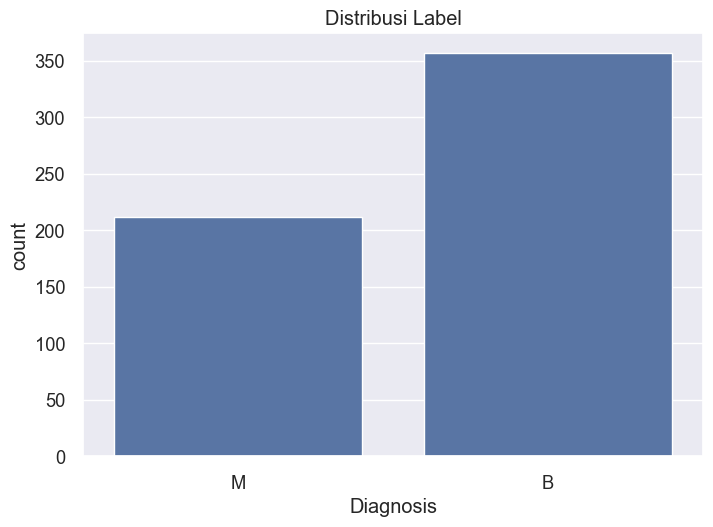

In [4]:
sns.countplot(data=df, x="Diagnosis")
plt.title("Distribusi Label")
plt.show()

# Persebaran value tiap fitur

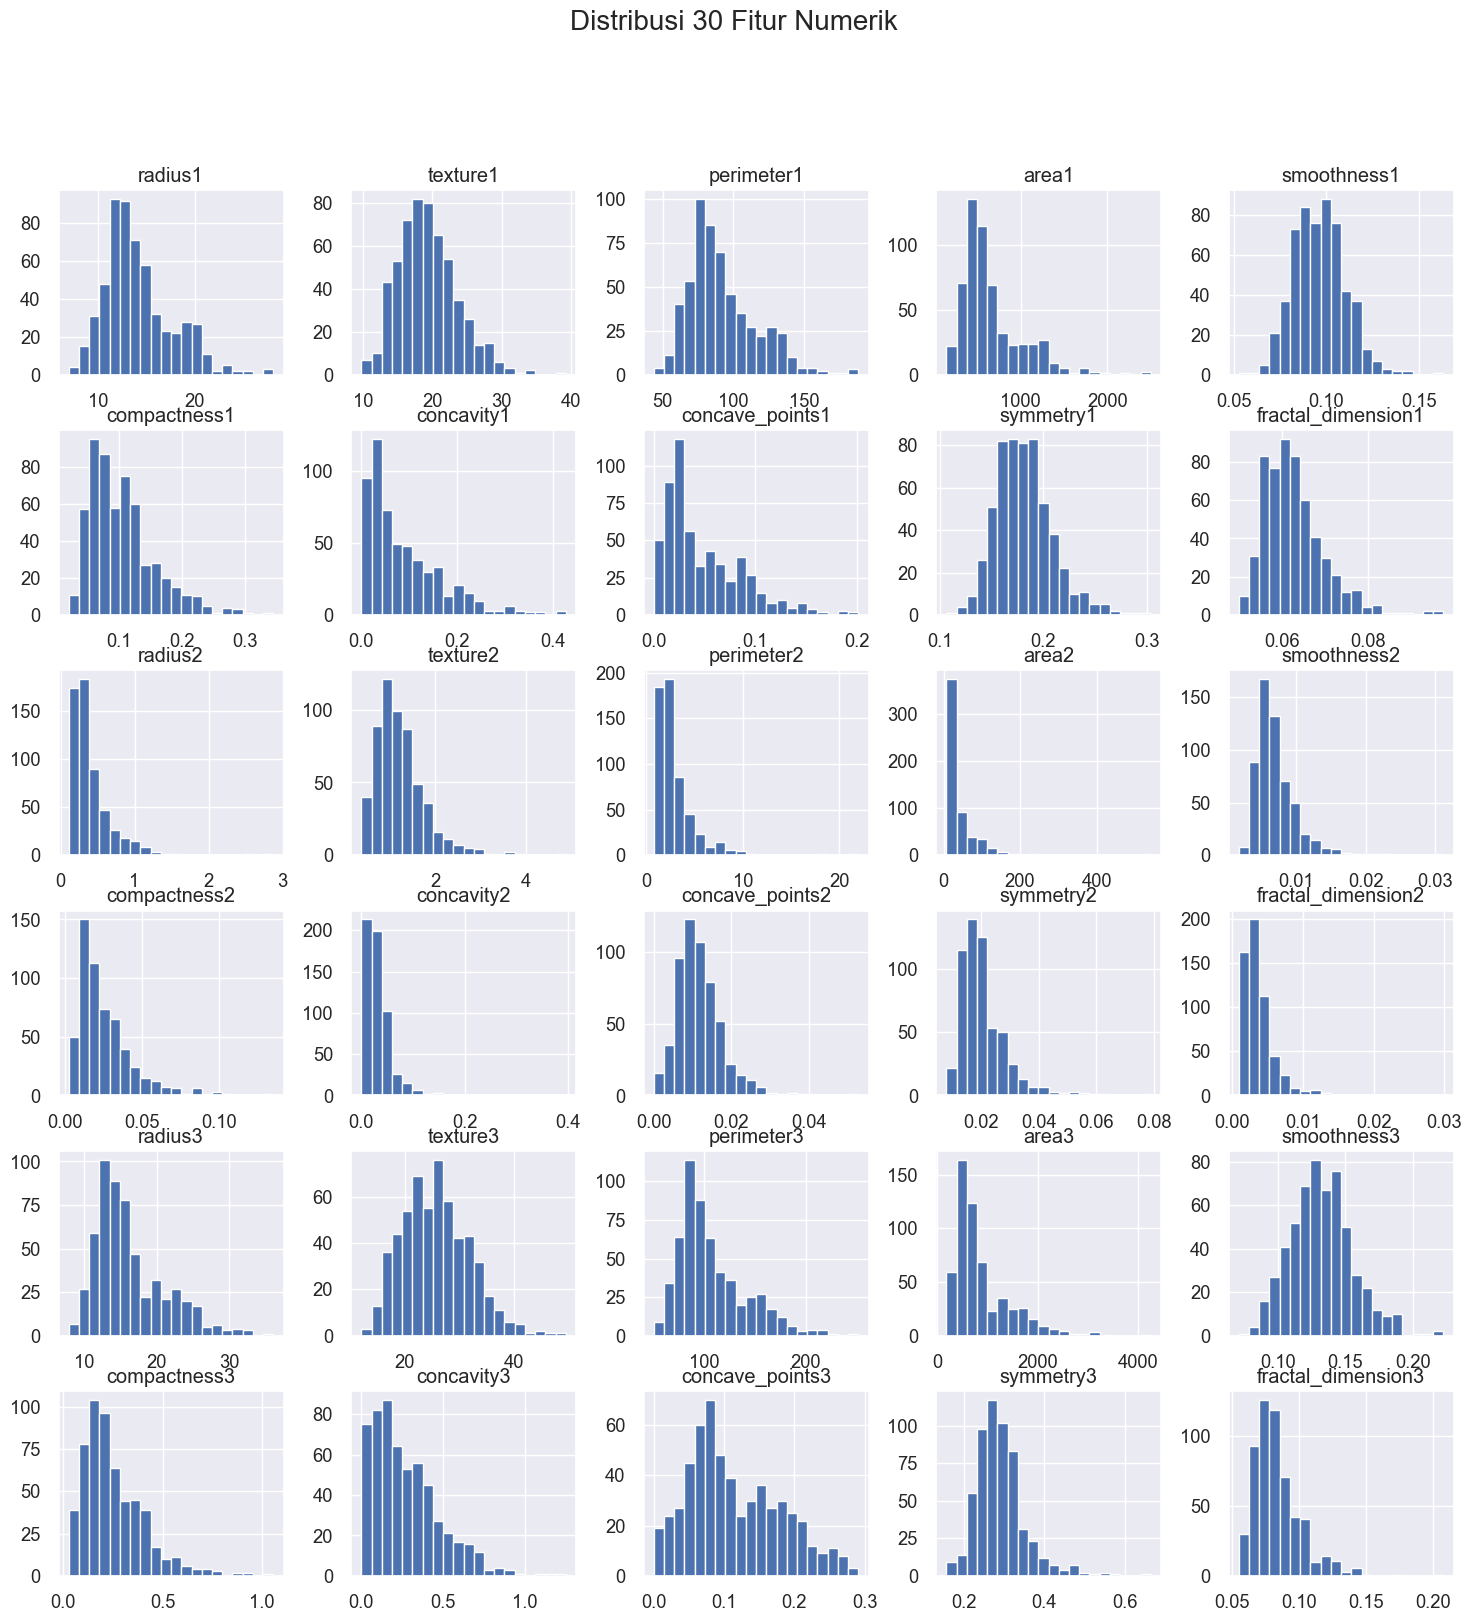

In [5]:
num_cols = df.drop(columns=["Diagnosis", "ID"], errors="ignore").columns

df[num_cols].hist(figsize=(18,18), bins=20)
plt.suptitle("Distribusi 30 Fitur Numerik", size=20)
plt.show()


# nilai fitur terhadap target

C:\Users\sadat\AppData\Local\Temp\ipykernel_10024\3837859450.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_target = df[num_cols].corrwith(df["Diagnosis"].replace({"M":1,"B":0}))


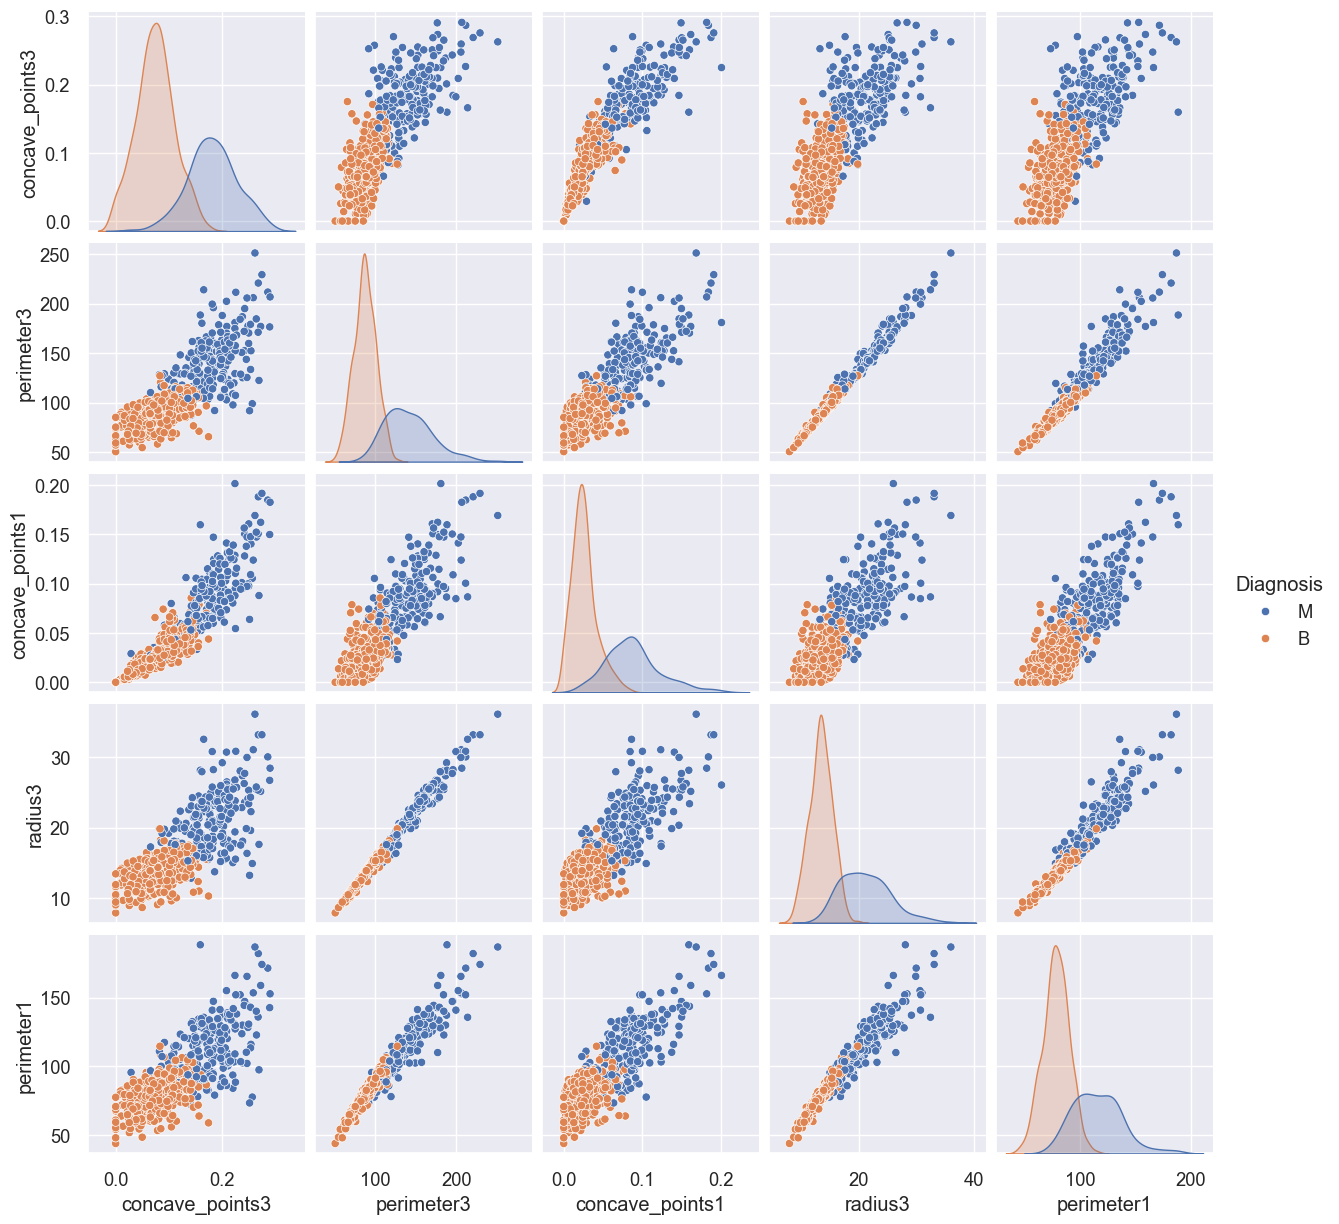

In [6]:
corr_target = df[num_cols].corrwith(df["Diagnosis"].replace({"M":1,"B":0}))
top5 = corr_target.abs().sort_values(ascending=False).head(5).index.tolist()

sns.pairplot(df, vars=top5, hue="Diagnosis", diag_kind="kde")
plt.show()


# Outlier

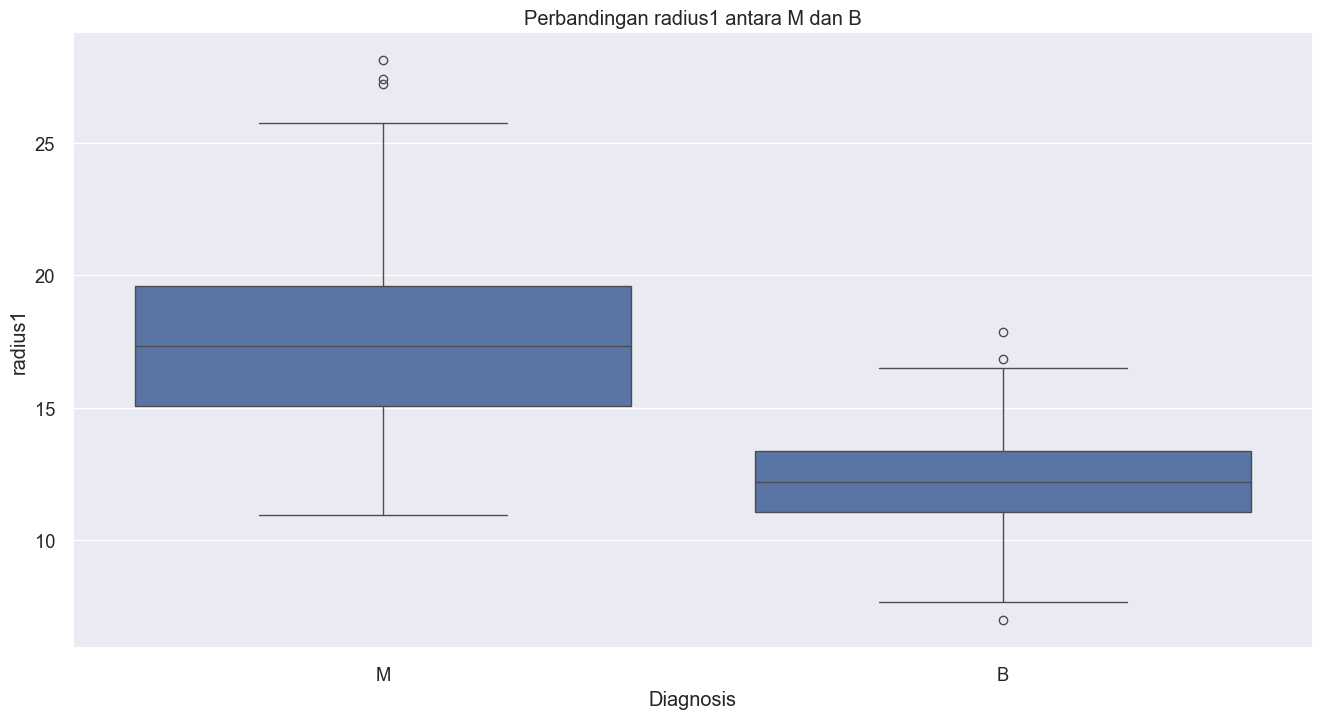

In [7]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x="Diagnosis", y="radius1")
plt.title("Perbandingan radius1 antara M dan B")
plt.show()


# Hubungan antar fitur

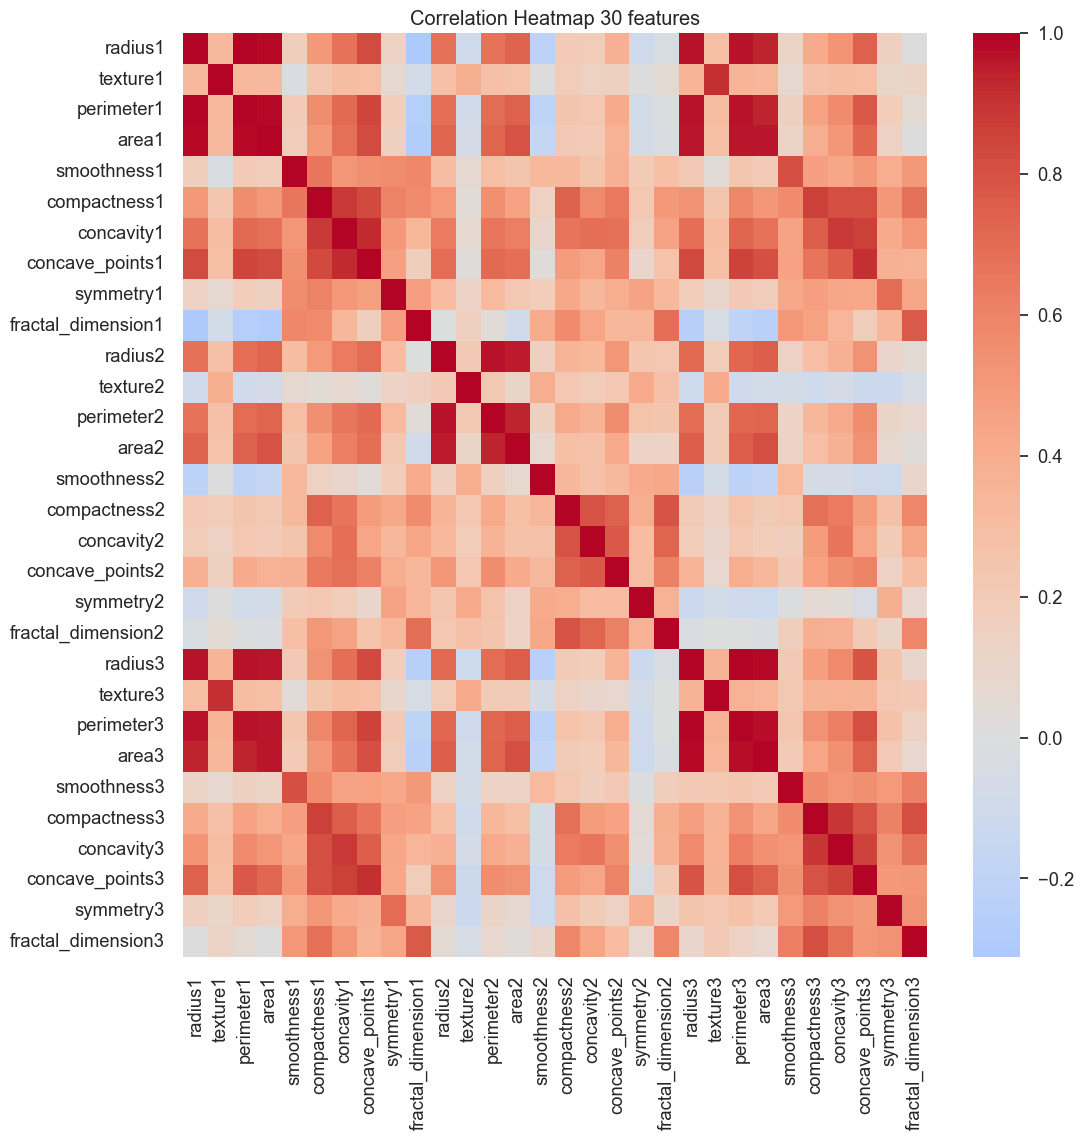

In [8]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap 30 features")
plt.show()
